In [34]:
# check if python >= 3.5
import sys
assert sys.version_info >= (3, 5)

# check if scikit-learn >= 0.20
import sklearn
assert sklearn.__version__ >= '0.20'

# common import
import numpy as np
import os

# set random seed
np.random.seed(42)

# plot pretty figure
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save figure
project_root_dir = '.'
chapter_name = 'classification'
images_path = os.path.join(project_root_dir, 'images', chapter_name)
os.makedirs(images_path, exist_ok=True)

def save_fig(fig_id, 
             tight_layout=True, 
             fig_extension='png',
             fig_resolution=300
             ):
    
    fig_path = os.path.join(images_path, fig_id + '.' + fig_extension)
    
    print('saving figure', '\t:', fig_id)
    
    if tight_layout:
        plt.tight_layout()
        
    plt.savefig(fig_path, format=fig_extension, dpi=fig_resolution)

# MNIST

The MNIST dataset is a set of 70,000 handwritten digits. 


In [35]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [36]:
mnist_feature_names = mnist['feature_names']

# cnt = 1
# for feature in mnist_feature_names:
#     print('feature', str(cnt),'\t:', feature)
#     cnt += 1

for i in range(10):
    print('feature', str(i+1), 'is', '\t:', mnist_feature_names[i])


feature 1 is 	: pixel1
feature 2 is 	: pixel2
feature 3 is 	: pixel3
feature 4 is 	: pixel4
feature 5 is 	: pixel5
feature 6 is 	: pixel6
feature 7 is 	: pixel7
feature 8 is 	: pixel8
feature 9 is 	: pixel9
feature 10 is 	: pixel10


In [37]:
mnist_descr = mnist['DESCR']
print(mnist_descr)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [38]:
mnist_details = mnist['details']

cnt = 1
for key, value in mnist_details.items():
    print('key', str(cnt), key, 'is:\n', value, '\n')
    cnt +=1


key 1 id is:
 554 

key 2 name is:
 mnist_784 

key 3 version is:
 1 

key 4 format is:
 ARFF 

key 5 upload_date is:
 2014-09-29T03:28:38 

key 6 licence is:
 Public 

key 7 url is:
 https://www.openml.org/data/v1/download/52667/mnist_784.arff 

key 8 file_id is:
 52667 

key 9 default_target_attribute is:
 class 

key 10 tag is:
 ['AzurePilot', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_41', 'study_99', 'vision'] 

key 11 visibility is:
 public 

key 12 status is:
 active 

key 13 processing_date is:
 2018-10-03 21:23:30 

key 14 md5_checksum is:
 0298d579eb1b86163de7723944c7e495 



In [39]:
mnist_categories = mnist['categories']
print('MNIST categories are:', mnist_categories)

MNIST categories are: {}


In [40]:
mnist_url = mnist['url']
print('MNIST url is:', mnist_url)

MNIST url is: https://www.openml.org/d/554


In [41]:
# read in the data & target
X, y = mnist['data'], mnist['target']
print('X shape', '\t:', X.shape)
print('y shape', '\t:', y.shape)

X shape 	: (70000, 784)
y shape 	: (70000,)


In [42]:
# print the raw data of one digit
import matplotlib as mpl
import matplotlib.pyplot as plt
# get the first row in 'data'
some_digit = X[0]
# reshape the row into a 2D array of 28 rows and 28 columns
some_digit_image = some_digit.reshape(28, 28)
print('the raw data in one row reshaped as 28x28 is:', '\n', some_digit_image)

the raw data in one row reshaped as 28x28 is: 
 [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253

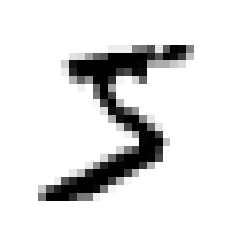

In [43]:
# plot one digit as image
plt.imshow(some_digit_image,
           cmap='binary')
plt.axis('off')
plt.show()

In [44]:
# print the target value corresponding to X[0]
print('data in y[0] is:')
print(y[0])
print('whose type is:', type(y[0]))

data in y[0] is:
5
whose type is: <class 'str'>


In [45]:
# convert y into integer
y = y.astype(np.uint8)
print('after converting, data in y[0] is:')
print(y[0])
print('whose type is:', type(y[0]))

after converting, data in y[0] is:
5
whose type is: <class 'numpy.uint8'>


saving figure 	: the_first_150_digits


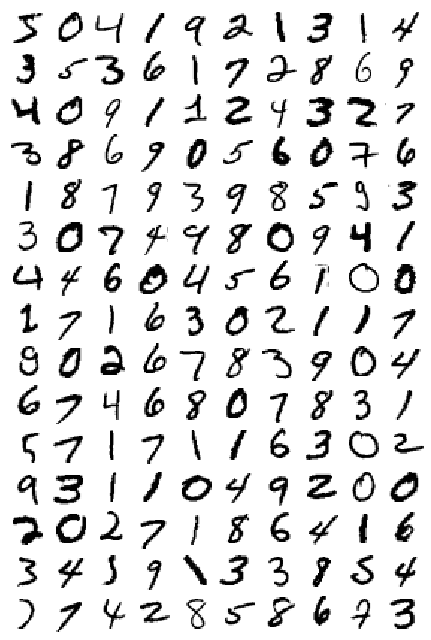

In [46]:
# function to plot digits
def plot_digits(instances, images_per_row=10, **options):
    image_size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(image_size, image_size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((image_size, image_size * n_empty)))
    
    for row in range(n_rows):
        r_images = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(r_images, axis=1))
    
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis('off')

# plot digits 
plt.figure(figsize=(9,9))

# get the first n rows (digits) from X
n_rows = 150
example_images = X[:n_rows]

plot_digits(example_images, images_per_row=10)
save_fig('the_first_' + str(n_rows) + '_digits')
plt.show()

In [47]:
# get the training and test data set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print('X_train shape is:', '\t:', X_train.shape)
print('y_train shape is:', '\t:', y_train.shape)
print('X_test shape is:',  '\t:', X_test.shape)
print('y_test shape is:',  '\t:', y_test.shape)

X_train shape is: 	: (60000, 784)
y_train shape is: 	: (60000,)
X_test shape is: 	: (10000, 784)
y_test shape is: 	: (10000,)


the last digit in X_train is:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.  38.  48.  48.  

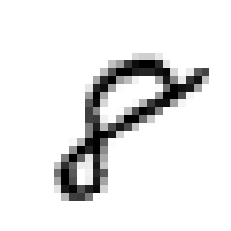

In [48]:
# print and plot the last digit in X_train
the_last_digit_in_X_train = X_train[-1]
the_last_digit_in_X_train_image = the_last_digit_in_X_train.reshape(28, 28)
print('the last digit in X_train is:')
print(the_last_digit_in_X_train_image)
plt.imshow(the_last_digit_in_X_train_image, cmap='binary')
plt.axis('off')
plt.show()

In [49]:
# print the last value in y_train
the_last_value_in_y_train = y_train[-1]
print('the last digit in y_train is', '\t:', the_last_value_in_y_train)

the last digit in y_train is 	: 8


# training a binary classifier